# ML@NERSC Survey Analysis

This notebook contains the plotting code for the ML@NERSC survey results.

To get started, download the responses spreadsheet as a tab-separated file (TSV) and put it in this directory.

ML@NERSC 2022 responses: https://docs.google.com/spreadsheets/d/1U6wNudHEaOquwzEF7ePONncIzXBmJpcbDNZoDo3sYtU/edit?usp=sharing

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

## Load the data

In [2]:
data = pd.read_csv('ML@NERSC User Survey 2022 (Responses) - Form Responses 1.tsv', sep='\t')

In [3]:
data

,Timestamp,How do you rate your expertise in Machine Learning?,What science domains are you using ML for?,Any publications that you would like to share with us,What frameworks/tools are you using?,What is your preferred environment for ML development?,Where do you run your ML models (include future plans)? [My own laptop or development box],Where do you run your ML models (include future plans)? [NERSC],Where do you run your ML models (include future plans)? [Other HPC center(s)],Where do you run your ML models (include future plans)? [University/Group cluster],...,How well does the ML software stack at NERSC satisfy your needs?,"How satisfied are you with NERSC's ML user support (documentation, help tickets, training events)?","For your ML workloads at NERSC, what are your biggest pain points? Please rate your level of concern or challenges with the following: [Installing/using software]","For your ML workloads at NERSC, what are your biggest pain points? Please rate your level of concern or challenges with the following: [Application performance]","For your ML workloads at NERSC, what are your biggest pain points? Please rate your level of concern or challenges with the following: [Getting interactive resources for development/testing]","For your ML workloads at NERSC, what are your biggest pain points? Please rate your level of concern or challenges with the following: [Submitting jobs]","For your ML workloads at NERSC, what are your biggest pain points? Please rate your level of concern or challenges with the following: [Getting jobs through the queues]",Are there any other aspects of running your ML workload at NERSC that you find challenging?,Do you have any other comments or suggestions to improve the suitability of NERSC resources for Machine Learning?,"Email (optional, so we can follow-up with you if relevant)"
0,4/8/2022 17:08:58,5.0,High Energy Physics,NaN,"TensorFlow 1, TensorFlow 2, Keras",IDEs / text editors and scripts,NaN,"Training, Inference",NaN,Inference,...,6.0,7.0,No challenge or concern,Somewhat challenging,Somewhat challenging,No challenge or concern,Highly challenging,NaN,NaN,NaN
1,4/8/2022 17:36:26,5.0,Applied Mathematics,https://arxiv.org/abs/2202.11214,"PyTorch, scikit-learn",IDEs / text editors and scripts,NaN,"Training, Inference",NaN,NaN,...,7.0,7.0,No challenge or concern,Somewhat challenging,No challenge or concern,No challenge or concern,Highly challenging,NaN,NaN,shashanksubramanian@lbl.gov
2,5/9/2022 16:40:25,1.0,Astrophysics,NaN,NaN,NaN,Inference,"Training, Inference",Inference,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5/9/2022 16:55:58,6.0,"Biosciences, Earth and Environmental Science, ...",NaN,"PyTorch, scikit-learn, weka",Notebooks (Jupyter or Colab),"Training, Inference","Training, Inference","Training, Inference",NaN,...,5.0,5.0,Somewhat challenging,Somewhat challenging,Highly challenging,Somewhat challenging,Highly challenging,NaN,NaN,NaN
4,5/10/2022 4:36:49,5.0,"Chemistry, Computer Science, Physics - General",NaN,"TensorFlow 2, PyTorch, JAX",IDEs / text editors and scripts,Training,NaN,Training,NaN,...,6.0,5.0,No challenge or concern,Somewhat challenging,Somewhat challenging,No challenge or concern,Somewhat challenging,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,6/16/2022 9:50:30,3.0,"Astrophysics, Computer Science, High Energy Ph...",NaN,PyTorch,IDEs / text editors and scripts,"Training, Inference","Training, Inference",NaN,NaN,...,3.0,3.0,No challenge or concern,Somewhat challenging,Somewhat challenging,Somewhat challenging,Highly challenging,I'm not sure if ipynb are suitable for nersc j...,NaN,NaN
170,6/16/2022 12:10:07,5.0,Chemistry,DOI: 10.1039/D2CY00284A,scikit-learn,IDEs / text editors and scripts,"Training, Inference",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171,6/16/2022 19:32:50,5.0,Materials Science,NaN,"TensorFlow 2, Keras, PyTorch",IDEs / text editors and scripts,"Training, Inference","Tra

## How do you rate your experience in ML?

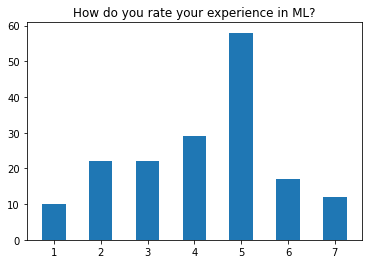

In [4]:
plt.figure()
plt.hist(data.iloc[:,1], bins=13, range=(0.75,7.25))
plt.title('How do you rate your experience in ML?');

## What science domains are you using ML for?

In [5]:
# Select the column and fill nans with empty string
responses = data.iloc[:,2].dropna()
responses

0                                    High Energy Physics
1                                    Applied Mathematics
2                                           Astrophysics
3      Biosciences, Earth and Environmental Science, ...
4         Chemistry, Computer Science, Physics - General
                             ...                        
169    Astrophysics, Computer Science, High Energy Ph...
170                                            Chemistry
171                                    Materials Science
172                                         Astrophysics
173          I am currently not using ML in my research.
Name: What science domains are you using ML for?, Length: 171, dtype: object

In [6]:
# Split multi-responses by comma and flatten the list
domains = responses.apply(lambda x: [s.strip() for s in x.split(',')]).explode()

In [7]:
# Get unique response counts
domain_counts = domains.value_counts(ascending=True)
domain_counts

I am currently not using ML in my research.     1
Planetary science / space physics               1
Computational Material                          1
Oceanography                                    1
Accelerator physics                             1
Condensed Matter Physics                        1
Renewable Energy                                1
Robotics                                        1
Materials science                               1
TEST                                            1
Materials Science                               6
Fusion Energy Science                           7
Medical                                         8
Geosciences                                    10
Nuclear Physics                                11
Biosciences                                    23
Engineering                                    24
Applied Mathematics                            24
Cosmology                                      24
Earth and Environmental Science                25


In [8]:
# Throw out rare responses
domain_counts = domain_counts[domain_counts > 1]

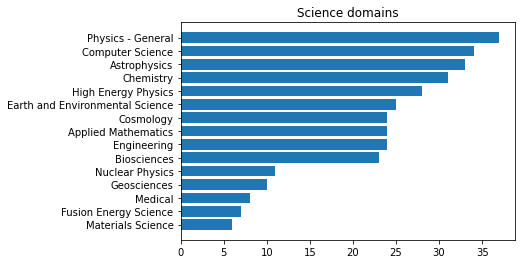

In [9]:
# Make the plot
fig, ax = plt.subplots()

ax.barh(domain_counts.index, domain_counts)
ax.set_title('Science domains');

## What frameworks/tools are you using?

In [10]:
responses = data.iloc[:,4].dropna()
responses

0      TensorFlow 1, TensorFlow 2, Keras
1                  PyTorch, scikit-learn
3            PyTorch, scikit-learn, weka
4             TensorFlow 2, PyTorch, JAX
5      TensorFlow 2, Keras, scikit-learn
                     ...                
169                              PyTorch
170                         scikit-learn
171         TensorFlow 2, Keras, PyTorch
172    TensorFlow 2, Keras, scikit-learn
173                  TensorFlow 1, Keras
Name: What frameworks/tools are you using?, Length: 162, dtype: object

In [11]:
# Split multi-responses by comma and flatten the list
frameworks = responses.apply(lambda x: [s.strip() for s in x.split(',')]).explode()

In [12]:
# Data cleanup, merging
frameworks[frameworks.str.contains('Flux')] = 'Flux'
frameworks[frameworks.str.contains('jax|flax|haiku', case=False)] = 'JAX'
frameworks[frameworks.str.contains('matlab', case=False)] = 'Matlab'

In [13]:
# Get unique response counts
framework_counts = frameworks.value_counts(ascending=True)
framework_counts

dont know yet                                                                                                  1
I'm still learning ML/DL techniques and currently in the process of comparing different Python frameworks.     1
we use some customized codes.                                                                                  1
in-house developed code                                                                                        1
Onnxruntime                                                                                                    1
Ray                                                                                                            1
Megatron                                                                                                       1
RLlib                                                                                                          1
TensorRT                                                                                        

In [14]:
# Filter out rare responses
framework_counts = framework_counts[framework_counts > 1]

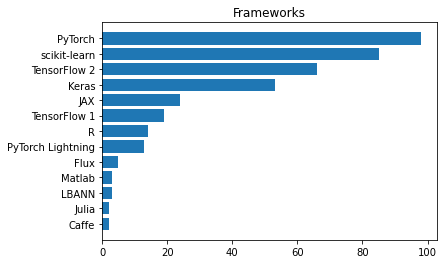

In [15]:
# Make the plot
fig, ax = plt.subplots()

ax.barh(framework_counts.index, framework_counts)
ax.set_title('Frameworks');

## What types of ML tasks do you employ?

In [33]:
def split_multi_response(x):
    """Splits a multiple checkbox answer column into single flattened Series"""
    x = x.dropna()
    return x.apply(lambda x: [s.strip() for s in x.split(',')]).explode()

In [34]:
responses = data.iloc[:,20]
responses

0      Classification, Regression, Segmentation / obj...
1      Unsupervised / self-supervised learning / clus...
2                 Classification, Reinforcement learning
3      Classification, Regression, Unsupervised / sel...
4      Unsupervised / self-supervised learning / clus...
                             ...                        
169    Classification, Unsupervised / self-supervised...
170                                           Regression
171                                           Regression
172                           Classification, Regression
173                                                 None
Name: What types of ML tasks do you employ?, Length: 174, dtype: object

In [35]:
tasks = split_multi_response(responses)
tasks

0                                         Classification
0                                             Regression
0                        Segmentation / object detection
0      Unsupervised / self-supervised learning / clus...
0                                    Generative modeling
                             ...                        
170                                           Regression
171                                           Regression
172                                       Classification
172                                           Regression
173                                                 None
Name: What types of ML tasks do you employ?, Length: 407, dtype: object

In [40]:
task_counts = tasks.value_counts(ascending=True)
#task_counts

In [38]:
# Filter rare responses
task_counts = task_counts[task_counts > 1]
task_counts

Reinforcement learning                                   25
Segmentation / object detection                          30
Generative modeling                                      53
Unsupervised / self-supervised learning / clustering     83
Classification                                           92
Regression                                              118
Name: What types of ML tasks do you employ?, dtype: int64

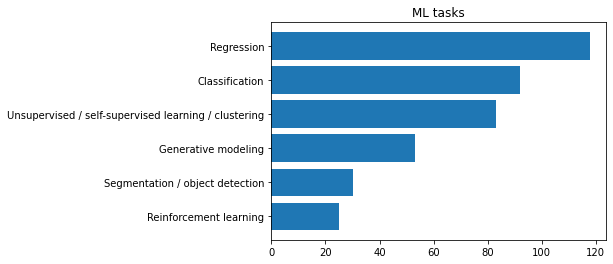

In [39]:
# Make the plot
fig, ax = plt.subplots()

ax.barh(task_counts.index, task_counts)
ax.set_title('ML tasks');

## What types of models are you using?

In [65]:
responses = data.iloc[:,21]

In [66]:
responses[3]

'Traditional ML models (SVM, Random Forest, Decision Trees, Ensemble Methods, etc), Fully-connected / feed-forward Neural Networks (MLPs), Convolutional Neural Networks (CNNs), Recurrent Neural Networks (RNNs, GRUs, LSTMs), Attention models (e.g. Transformer, BERT, GPT), Graph or point-cloud Neural Networks'

In [69]:
# Simplify responses before splitting (e.g. to remove commas)
responses = (
    responses.str.replace(
        'Traditional ML models (SVM, Random Forest, Decision Trees, Ensemble Methods, etc)', 'Traditional ML', regex=False)
    .str.replace(
        'Fully-connected / feed-forward Neural Networks (MLPs)', 'Fully-connected Neural Networks', regex=False)
    .str.replace(
        'Convolutional Neural Networks (CNNs)', 'Convolutional Neural Networks', regex=False)
    .str.replace(
        'Recurrent Neural Networks (RNNs, GRUs, LSTMs)', 'Recurrent Neural Networks', regex=False)
    .str.replace(
        'Attention models (e.g. Transformer, BERT, GPT)', 'Transformers', regex=False)
    .str.replace(
        'Graph or point-cloud Neural Networks', 'Graph/Point Neural Networks', regex=False)
)

In [72]:
models = split_multi_response(responses)

In [76]:
models[models.str.contains('flow', case=False)] = 'Flow-based models'

In [79]:
models[models.str.contains('gaussian|gpr', case=False)] = 'Gaussian Processes'

In [81]:
model_counts = models.value_counts(ascending=True)
model_counts

None                                                 1
cGAN                                                 1
Bayesian methods                                     1
Reservoir Methods                                    1
BP                                                   1
Not sure yet                                         1
Variational AE                                       1
Have not started yet. Need to learn first step.      1
Bayesian Neural Networks                             1
Hamiltonian Monte Carlo Markov Chains                1
Custom architectures                                 1
Flow-based models                                    3
Gaussian Processes                                   4
Transformers                                        36
Graph/Point Neural Networks                         44
Recurrent Neural Networks                           50
Fully-connected Neural Networks                     84
Traditional ML                                      94
Convolutio

In [82]:
model_counts = model_counts[model_counts > 1]

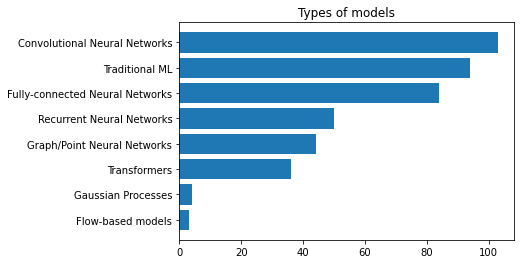

In [83]:
# Make the plot
fig, ax = plt.subplots()

ax.barh(model_counts.index, model_counts)
ax.set_title('Types of models');